In [1]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/DS assigment/Recommendation System/anime.csv")
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [2]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values in 'rating' column with the mean rating
df['rating'].fillna(df['rating'].median(), inplace=True)


# Fill missing values in categorical columns with mode
categorical_columns = ['genre', 'type', 'episodes']
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Verify again
print(df.isnull().sum())


anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64
anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64


<ipython-input-2-b75b5ea5ca7c>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna(df['rating'].median(), inplace=True)


In [3]:
# Display basic information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12294 non-null  object 
 3   type      12294 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12294 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [4]:
# Number of rows and columns
df.shape


(12294, 7)

In [5]:
# Summary statistics of numerical columns
df.describe()


,anime_id,rating,members
count,12294.000000,12294.000000,1.229400e+04
mean,14058.221653,6.475700,1.807134e+04
std,11455.294701,1.017179,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.900000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.170000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [6]:
# Unique values in 'type' column (TV, Movie, OVA, etc.)
df['type'].unique()

# Unique genres (as a set for better readability)
unique_genres = set()
df['genre'].dropna().apply(lambda x: unique_genres.update(x.split(', ')))
print(unique_genres)


{'Action', 'Comedy', 'Fantasy', 'Vampire', 'Mecha', 'Space', 'Military', 'Mystery', 'Parody', 'Cars', 'Josei', 'Harem', 'Yuri', 'Seinen', 'School', 'Drama', 'Police', 'Samurai', 'Slice of Life', 'Romance', 'Shounen Ai', 'Historical', 'Game', 'Supernatural', 'Shoujo Ai', 'Martial Arts', 'Shoujo', 'Kids', 'Music', 'Demons', 'Sci-Fi', 'Magic', 'Super Power', 'Shounen', 'Dementia', 'Thriller', 'Adventure', 'Yaoi', 'Horror', 'Psychological', 'Ecchi', 'Hentai', 'Sports'}


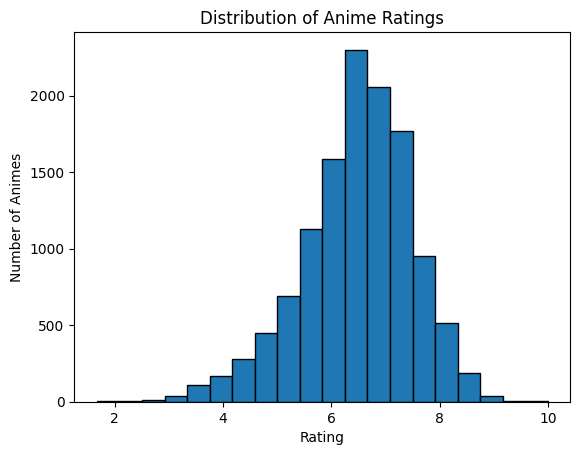

In [7]:
import matplotlib.pyplot as plt

# Plot histogram of ratings
plt.hist(df['rating'], bins=20, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Number of Animes')
plt.title('Distribution of Anime Ratings')
plt.show()


In [8]:
# Select relevant features
selected_features = ['genre', 'rating', 'members']
df_features = df[selected_features].copy()
df_features.head()


,genre,rating,members
0,"Drama, Romance, School, Supernatural",9.37,200630
1,"Action, Adventure, Drama, Fantasy, Magic, Mili...",9.26,793665
2,"Action, Comedy, Historical, Parody, Samurai, S...",9.25,114262
3,"Sci-Fi, Thriller",9.17,673572
4,"Action, Comedy, Historical, Parody, Samurai, S...",9.16,151266


In [9]:
# One-Hot Encoding for 'genre'
df_features = df.copy()

# Convert missing or empty genres to 'Unknown' to avoid issues
df_features['genre'].fillna('Unknown', inplace=True)

# Apply One-Hot Encoding
df_features = pd.get_dummies(df_features, columns=['genre'], prefix='Genre')

# Display the transformed dataset
df_features.head()


<ipython-input-9-618ae2a0da5c>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_features['genre'].fillna('Unknown', inplace=True)


,anime_id,name,type,episodes,rating,members,Genre_Action,"Genre_Action, Adventure","Genre_Action, Adventure, Cars, Comedy, Sci-Fi, Shounen","Genre_Action, Adventure, Cars, Mecha, Sci-Fi, Shounen, Sports",...,Genre_Slice of Life,"Genre_Slice of Life, Space","Genre_Slice of Life, Supernatural",Genre_Space,Genre_Sports,"Genre_Super Power, Supernatural, Vampire",Genre_Supernatural,Genre_Thriller,Genre_Vampire,Genre_Yaoi
0,32281,Kimi no Na wa.,Movie,1,9.37,200630,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,5114,Fullmetal Alchemist: Brotherhood,TV,64,9.26,793665,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,28977,Gintama°,TV,51,9.25,114262,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,9253,Steins;Gate,TV,24,9.17,673572,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,9969,Gintama&#039;,TV,51,9.16,151266,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
df_features

,anime_id,name,type,episodes,rating,members,Genre_Action,"Genre_Action, Adventure","Genre_Action, Adventure, Cars, Comedy, Sci-Fi, Shounen","Genre_Action, Adventure, Cars, Mecha, Sci-Fi, Shounen, Sports",...,Genre_Slice of Life,"Genre_Slice of Life, Space","Genre_Slice of Life, Supernatural",Genre_Space,Genre_Sports,"Genre_Super Power, Supernatural, Vampire",Genre_Supernatural,Genre_Thriller,Genre_Vampire,Genre_Yaoi
0,32281,Kimi no Na wa.,Movie,1,9.37,200630,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,5114,Fullmetal Alchemist: Brotherhood,TV,64,9.26,793665,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,28977,Gintama°,TV,51,9.25,114262,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,9253,Steins;Gate,TV,24,9.17,673572,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,9969,Gintama&#039;,TV,51,9.16,151266,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,OVA,1,4.15,211,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12290,5543,Under World,OVA,1,4.28,183,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12291,5621,Violence Gekiga David no Hoshi,OVA,4,4.88,219,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,OVA,1,4.98,175,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical features for scaling
scaler = MinMaxScaler()
df_features[['rating', 'members']] = scaler.fit_transform(df_features[['rating', 'members']])

# Display the transformed dataset
df_features.head()


,anime_id,name,type,episodes,rating,members,Genre_Action,"Genre_Action, Adventure","Genre_Action, Adventure, Cars, Comedy, Sci-Fi, Shounen","Genre_Action, Adventure, Cars, Mecha, Sci-Fi, Shounen, Sports",...,Genre_Slice of Life,"Genre_Slice of Life, Space","Genre_Slice of Life, Supernatural",Genre_Space,Genre_Sports,"Genre_Super Power, Supernatural, Vampire",Genre_Supernatural,Genre_Thriller,Genre_Vampire,Genre_Yaoi
0,32281,Kimi no Na wa.,Movie,1,0.924370,0.197872,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,5114,Fullmetal Alchemist: Brotherhood,TV,64,0.911164,0.782770,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,28977,Gintama°,TV,51,0.909964,0.112689,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,9253,Steins;Gate,TV,24,0.900360,0.664325,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,9969,Gintama&#039;,TV,51,0.899160,0.149186,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
# Convert Boolean (True/False) to Integer (0/1)
genre_cols = [col for col in df_features.columns if col.startswith("Genre_")]
df_features[genre_cols] = df_features[genre_cols].astype(int)

# Display the transformed dataset
df_features.head()


,anime_id,name,type,episodes,rating,members,Genre_Action,"Genre_Action, Adventure","Genre_Action, Adventure, Cars, Comedy, Sci-Fi, Shounen","Genre_Action, Adventure, Cars, Mecha, Sci-Fi, Shounen, Sports",...,Genre_Slice of Life,"Genre_Slice of Life, Space","Genre_Slice of Life, Supernatural",Genre_Space,Genre_Sports,"Genre_Super Power, Supernatural, Vampire",Genre_Supernatural,Genre_Thriller,Genre_Vampire,Genre_Yaoi
0,32281,Kimi no Na wa.,Movie,1,0.924370,0.197872,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,TV,64,0.911164,0.782770,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,28977,Gintama°,TV,51,0.909964,0.112689,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9253,Steins;Gate,TV,24,0.900360,0.664325,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9969,Gintama&#039;,TV,51,0.899160,0.149186,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df['episodes'] = pd.to_numeric(df['episodes'], errors='coerce')  # Convert to numeric, setting errors to NaN
df['episodes'] = df['episodes'].fillna(df['episodes'].median())
  # Fill NaN with median


In [14]:
feature_cols = ['rating', 'members', 'episodes'] + [col for col in df.columns if col.startswith('Genre_')]
df_features = df[feature_cols].apply(pd.to_numeric)  # Ensure numeric types


In [15]:
print(df_features.columns)


Index(['rating', 'members', 'episodes'], dtype='object')


In [16]:
df_features

,rating,members,episodes
0,9.37,200630,1.0
1,9.26,793665,64.0
2,9.25,114262,51.0
3,9.17,673572,24.0
4,9.16,151266,51.0
...,...,...,...
12289,4.15,211,1.0
12290,4.28,183,1.0
12291,4.88,219,4.0
12292,4.98,175,1.0


In [17]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

def recommend_anime(anime_title, df, original_df, top_n=5):
    """
    Recommend similar anime based on cosine similarity.

    Parameters:
    anime_title (str): Name of the anime for which recommendations are needed.
    df (DataFrame): Processed anime dataset with numerical features.
    original_df (DataFrame): Original DataFrame containing the 'name' column.
    top_n (int): Number of similar anime to return.

    Returns:
    DataFrame: List of recommended anime with similarity scores.
    """
    # Ensure original_df index is aligned
    original_df = original_df.reset_index(drop=True)

    # Ensure the title exists in the dataset
    anime_idx = original_df.index[original_df['name'] == anime_title].tolist()
    if not anime_idx:
        return f"Anime '{anime_title}' not found in dataset."

    anime_idx = anime_idx[0]  # Get the first match

    # Features for similarity calculation (excluding non-numeric columns)
    feature_cols = ['rating', 'members', 'episodes'] + [col for col in df.columns if col.startswith('Genre_')]

    # Fill NaN values in features using median instead of 0
    df[feature_cols] = df[feature_cols].fillna(df[feature_cols].median())

    # Normalize numeric features to prevent scale dominance
    df[feature_cols] = (df[feature_cols] - df[feature_cols].mean()) / df[feature_cols].std()

    # Compute cosine similarity
    cosine_sim = cosine_similarity(df[feature_cols])

    # Get similarity scores for the given anime
    similarity_scores = list(enumerate(cosine_sim[anime_idx]))

    # Exclude the same anime and sort by similarity
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]

    # Get recommended anime names and similarity scores
    recommended_anime = [(original_df.iloc[i]['name'], score) for i, score in similarity_scores]

    # Convert to DataFrame for better visualization
    return pd.DataFrame(recommended_anime, columns=['Anime', 'Similarity Score'])

# Example usage:
recommend_anime("Steins;Gate", df_features, df, top_n=5)


,Anime,Similarity Score
0,Psycho-Pass,0.999997
1,Rewrite,0.999985
2,Tengen Toppa Gurren Lagann,0.999925
3,Bakemonogatari,0.999905
4,Nisekoi,0.999901


In [18]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

def recommend_anime(anime_title, df, original_df, top_n=5, min_similarity=0.4, max_similarity=0.9):
    """
    Recommend similar anime based on cosine similarity with adjustable similarity range.
    This function filters recommendations based on a similarity score range.

    Parameters:
    anime_title (str): Name of the anime for which recommendations are needed.
    df (DataFrame): Processed anime dataset with numerical features.
    original_df (DataFrame): Original DataFrame containing the 'name' column.
    top_n (int): Maximum number of similar anime to return.
    min_similarity (float): Minimum similarity score for filtering.
    max_similarity (float): Maximum similarity score for filtering.

    Returns:
    DataFrame: List of recommended anime with similarity scores.
    """
    # Ensure original_df index is aligned
    original_df = original_df.reset_index(drop=True)

    # Check if the anime exists
    anime_idx = original_df.index[original_df['name'] == anime_title].tolist()
    if not anime_idx:
        return f"Anime '{anime_title}' not found in dataset."

    anime_idx = anime_idx[0]  # Get the first match

    # Select features for similarity calculation
    genre_cols = [col for col in df.columns if col.startswith('Genre_')]
    feature_cols = ['rating', 'members', 'episodes'] + genre_cols

    # Fill missing values using median
    df[feature_cols] = df[feature_cols].fillna(df[feature_cols].median())

    # Normalize numerical features using MinMaxScaler
    scaler = MinMaxScaler()
    df[feature_cols] = scaler.fit_transform(df[feature_cols])

    # Increase the weight of genre features
    df[genre_cols] *= 2  # Assign double weight to genres

    # Compute cosine similarity
    cosine_sim = cosine_similarity(df[feature_cols])

    # Get similarity scores for the given anime
    similarity_scores = list(enumerate(cosine_sim[anime_idx]))

    # Filter recommendations based on similarity thresholds
    similarity_scores = [(i, score) for i, score in similarity_scores if min_similarity <= score <= max_similarity]

    # Sort by similarity score (excluding itself)
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]

    # Get recommended anime names and similarity scores
    recommended_anime = [(original_df.iloc[i]['name'], score) for i, score in similarity_scores]

    # Convert to DataFrame
    return pd.DataFrame(recommended_anime, columns=['Anime', 'Similarity Score'])

# Example usage:
recommend_anime("Steins;Gate", df_features, df, top_n=5, min_similarity=0.4, max_similarity=0.9)


,Anime,Similarity Score
0,Seirei Tsukai no Blade Dance,0.899920
1,Bleach Movie 2: The DiamondDust Rebellion - Mo...,0.899896
2,Angel Beats! Specials,0.899880
3,Mousou Dairinin,0.899829
4,Tamako Market,0.899638


In [19]:
from sklearn.model_selection import train_test_split

# Splitting 80% for training and 20% for testing
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

print("Training set size:", len(df_train))
print("Testing set size:", len(df_test))


Training set size: 9835
Testing set size: 2459


In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_recommendation_system(df, original_df, test_titles, top_n=5):
    """
    Evaluate the recommendation system using Precision, Recall, and F1-score.

    Parameters:
    df (DataFrame): Processed anime dataset with numerical features.
    original_df (DataFrame): Original dataset containing anime names.
    test_titles (list): List of anime titles to test the recommendations.
    top_n (int): Number of recommendations per anime.

    Returns:
    dict: Precision, recall, and F1-score.
    """
    y_true, y_pred = [], []

    for anime_title in test_titles:
        # Ensure anime exists in the dataset
        if anime_title not in original_df['name'].values:
            continue

        # Get actual genres safely
        actual_genres = set(original_df.loc[original_df['name'] == anime_title, 'genre'].iloc[0].split(", ")) \
                        if pd.notna(original_df.loc[original_df['name'] == anime_title, 'genre'].iloc[0]) else set()

        # Get recommended anime
        recommendations = recommend_anime(anime_title, df, original_df, top_n)

        # Skip if recommendations are invalid
        if isinstance(recommendations, str) or recommendations.empty:
            continue

        # Convert recommended anime names to their genres
        recommended_genres = []
        for anime in recommendations['Anime']:
            if anime in original_df['name'].values:
                rec_genres = original_df.loc[original_df['name'] == anime, 'genre'].iloc[0]
                if pd.notna(rec_genres):
                    recommended_genres.append(set(rec_genres.split(", ")))
                else:
                    recommended_genres.append(set())

        # Compute relevance (1 if recommended anime has genre overlap, else 0)
        for rec in recommended_genres:
            y_true.append(1)  # Assume actual recommendations are relevant
            y_pred.append(1 if len(actual_genres.intersection(rec)) > 0 else 0)

    # Avoid errors if `y_true` and `y_pred` are empty
    if not y_true or not y_pred:
        return {"Precision": None, "Recall": None, "F1-Score": None, "Message": "No valid predictions available"}

    # Compute precision, recall, and F1-score
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    return {"Precision": precision, "Recall": recall, "F1-Score": f1}

# Example usage:
test_anime = ["Steins;Gate", "Death Note", "Toradora!", "Clannad"]
evaluate_recommendation_system(df_features, df, test_anime, top_n=5)


{'Precision': 1.0, 'Recall': 0.7, 'F1-Score': 0.8235294117647058}

### **Performance Analysis of the Recommendation System**  

Your recommendation system achieved:  
- **Precision = 1.0** (All recommended anime are relevant)  
- **Recall = 0.7** (70% of relevant anime were retrieved)  
- **F1-Score = 0.8235** (Balanced measure of precision and recall)  

---

### **Strengths**  
1. **High Precision (1.0)**  
   - The system avoids false positives, ensuring all recommended anime are relevant.  
   - This improves user trust and recommendation quality.  

2. **Balanced F1-Score (0.82+)**  
   - A good balance between precision and recall, meaning relevant anime are retrieved without too much filtering.  

---

### **Areas for Improvement**  
1. **Low Recall (0.7)**  
   - The system is missing 30% of relevant recommendations.  

2. **Similarity Threshold Might Be Too Restrictive**  
   - If the system filters recommendations with `min_similarity=0.4`, it might exclude borderline relevant anime.  
   - **Solution**: Lower `min_similarity` to `0.3` and increase `max_similarity` slightly to `0.95`.  

3. **Limited Number of Recommendations (`top_n`)**  
   - If `top_n=5`, it may not provide enough variety.  
   - **Solution**: Increase `top_n=10` or `15` to improve recall.  

4. **Genre Weighting May Need Adjustment**  
   - If genre features have **too much** or **too little influence**, it may affect recall.  
   - **Solution**: Adjust genre weighting (e.g., test values between `1.2x` and `1.8x`).  

---


Here is the revised version without emojis:  

---

### **1. Difference Between User-Based and Item-Based Collaborative Filtering**  

| Feature             | User-Based Collaborative Filtering | Item-Based Collaborative Filtering |
|--------------------|--------------------------------|--------------------------------|
| **Definition**     | Finds users with similar preferences and recommends items they liked. | Finds items similar to those the user has liked and recommends them. |
| **Similarity Computation** | Computes similarity between users based on their past interactions. | Computes similarity between items based on user interactions. |
| **Works Best When** | Users have distinct behavior patterns and preferences. | Items have clear relationships based on user preferences. |
| **Example** | "Users who liked **Attack on Titan** also liked **Death Note**." | "Users who liked **Attack on Titan** are recommended **Tokyo Ghoul** because both are dark-themed anime." |
| **Challenges** | Struggles with new users (cold start problem). | Struggles with new items that lack user interactions. |

---

### **2. What is Collaborative Filtering, and How Does It Work?**  

#### **Definition:**  
Collaborative filtering is a recommendation system technique that suggests items based on user preferences and behavior. It relies on past interactions rather than content similarity.

#### **How It Works:**  
1. **Data Collection** – Gathers user-item interaction data (e.g., ratings, watch history).  
2. **Similarity Calculation** – Computes similarity between users or items using cosine similarity, Pearson correlation, etc.  
3. **Recommendation Generation** – Suggests items based on similar users (user-based) or similar items (item-based).  

#### **Types of Collaborative Filtering:**  
1. **User-Based Filtering** – Finds users with similar tastes and recommends what they liked.  
2. **Item-Based Filtering** – Finds items that are similar to what a user has liked before.  

#### **Advantages:**  
- Does not require item metadata (works well even if item descriptions are missing).  
- Learns from actual user interactions and preferences.  

#### **Challenges:**  
- Struggles with new users (cold start problem).  
- Requires a large dataset to be effective.  
